In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../CatanResults/catan_results_MCTS.csv")

In [5]:
data

,Winner Type,Winner Num,First Player Type,First Player VP,Second Player Type,Second Player VP,Third Player Type,Third Player VP,Fourth Player Type,Fourth Player VP,...,MCTS Num Road Builder Played,MCTS Num VP Dev Cards,MCTS Num Devs Bought,MCTS Total Trades Accepted,MCTS Total Trades Proposed,MCTS Trades Proposed Successfully,Total Trades with Bank,Average Move per Turn,Average Number of Moves Considered by MCTS Algorithm,Average Number of Cycles Run by MCTS Algorithm per Decided Move
0,MCTS,2,Random,6,MCTS,10,Random,2,NaN,NaN,...,1,1,13,59,88,29,21,9.466667,100,11.973913
1,MCTS,2,Random,2,MCTS,10,Random,3,NaN,NaN,...,1,3,13,60,93,20,14,8.924242,100,11.080925
2,MCTS,1,MCTS,10,Random,3,Random,2,NaN,NaN,...,0,1,4,27,45,14,10,8.527778,100,10.298343
3,MCTS,2,Random,2,MCTS,10,Random,8,NaN,NaN,...,0,0,10,124,163,51,91,9.522936,100,11.796380
4,MCTS,2,Random,2,MCTS,10,Random,5,NaN,NaN,...,0,3,14,66,92,26,11,9.583333,100,10.154472
5,MCTS,3,Random,5,Random,5,MCTS,10,NaN,NaN,...,0,1,8,73,105,28,13,9.587302,100,11.301939
6,MCTS,3,Random,3,Random,5,MCTS,10,NaN,NaN,...,2,3,11,82,135,39,12,9.357143,100,10.297872
7,MCTS,2,Random,2,MCTS,10,Random,6,NaN,NaN,...,0,0,5,50,67,21,16,10.048780,100,14.452471
8,MCTS,1,MCTS,10,Random,4,Random,2,NaN,NaN,...,0,1,7,48,52,17,9,8.622222,100,8.756757
9,MCTS,3,Random,5,Random,2,MCTS,10,NaN,NaN,...,0,1,7,75,105,19,13,9.289855,100,9.441489


In [9]:
data['Winner Type'].value_counts()['MCTS'] / len(data)

0.9242718446601942

In [22]:
MCTSfirst = data.loc[data['First Player Type'] == "MCTS"]
MCTSsecond = data.loc[data['Second Player Type'] == "MCTS"]
MCTSthird = data.loc[data['Third Player Type'] == "MCTS"]

In [23]:
p3_vals = MCTSthird['Third Player VP'].value_counts()
p2_vals = MCTSsecond['Second Player VP'].value_counts()
p1_vals = MCTSfirst['First Player VP'].value_counts()

In [36]:
p1_vals

10    148
11     15
2       8
9       2
3       2
6       1
Name: First Player VP, dtype: int64

In [47]:
p3 = np.asarray([p3_vals[2], 0, 0, 0, p3_vals[6], \
     p3_vals[7], p3_vals[8], p3_vals[9], p3_vals[10], p3_vals[11], 0])
p2 = np.asarray([p2_vals[2], p2_vals[3], p2_vals[4], p2_vals[5], \
     0, 0, 0, p2_vals[9], p2_vals[10], p2_vals[11], 0])
p1 = np.asarray([p1_vals[2], p1_vals[3], 0, 0, p1_vals[6], \
     0, 0, p1_vals[9], p1_vals[10], p1_vals[11], 0])
p3 = tuple(p3 / len(MCTSthird))
p2 = tuple(p2 / len(MCTSsecond))
p1 = tuple(p1 / len(MCTSfirst))

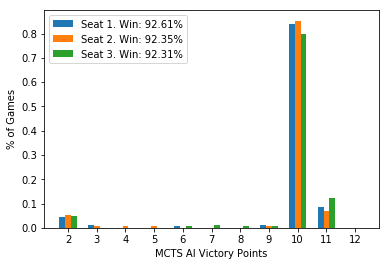

In [62]:
width = 0.2
ind = np.asarray((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
pl1 = plt.bar(ind - width, p1, width)
pl2 = plt.bar(ind, p2, width)
pl3 = plt.bar(ind + width, p3, width)
plt.xticks(ind)
plt.xlabel('MCTS AI Victory Points')
plt.ylabel('% of Games')
plt.legend((pl1[0], pl2[0], pl3[0]), \
           ('Seat 1. Win: 92.61%', 'Seat 2. Win: 92.35%', 'Seat 3. Win: 92.31%'))
plt.show()

In [56]:
winsFirst = MCTSfirst['Winner Num'].value_counts()
winsSecond = MCTSsecond['Winner Num'].value_counts()
winsThird = MCTSthird['Winner Num'].value_counts()

In [59]:
p1_win_rate = winsFirst[1] / (winsFirst[1] + winsFirst[2] + winsFirst[3])
p2_win_rate = winsSecond[2] / (winsSecond[1] + winsSecond[2] + winsSecond[3])
p3_win_rate = winsThird[3] / (winsThird[1] + winsThird[2] + winsThird[3])

In [60]:
print(p1_win_rate)
print(p2_win_rate)
print(p3_win_rate)

0.9261363636363636
0.9235294117647059
0.9230769230769231


In [65]:
data['Average Number of Cycles Run by MCTS Algorithm per Decided Move'].mean()

11.281017358469882

In [75]:
MCTSfirst['Num Initial Dots Player 1'].count()

176

In [76]:
MCTSsecond['Num Initial Dots Player 2'].count()

170

In [77]:
MCTSthird['Num Initial Dots Player 3'].count()

169

In [78]:
((MCTSfirst['Num Initial Dots Player 1'].count() * \
MCTSfirst['Num Initial Dots Player 1'].mean()) + \
(MCTSsecond['Num Initial Dots Player 2'].count() * \
MCTSsecond['Num Initial Dots Player 2'].mean()) + \
(MCTSthird['Num Initial Dots Player 3'].count() * \
MCTSthird['Num Initial Dots Player 3'].mean())) / \
(MCTSfirst['Num Initial Dots Player 1'].count() + \
MCTSsecond['Num Initial Dots Player 2'].count() + \
MCTSthird['Num Initial Dots Player 3'].count())

19.994174757281552

In [81]:
((MCTSfirst['Num Initial Dots Player 2'].count() * \
(MCTSfirst['Num Initial Dots Player 2'].mean() + \
 MCTSfirst['Num Initial Dots Player 3'].mean())) + \
(MCTSsecond['Num Initial Dots Player 2'].count() * \
(MCTSsecond['Num Initial Dots Player 1'].mean() + \
 MCTSsecond['Num Initial Dots Player 3'].mean())) + \
(MCTSthird['Num Initial Dots Player 2'].count() * \
(MCTSthird['Num Initial Dots Player 1'].mean() + \
 MCTSthird['Num Initial Dots Player 2'].mean()))) / \
(2 * (MCTSfirst['Num Initial Dots Player 1'].count() + \
MCTSsecond['Num Initial Dots Player 2'].count() + \
MCTSthird['Num Initial Dots Player 3'].count()))

12.155339805825243

In [89]:
data['MCTS Num Devs Bought'].mean()

8.69514563106796

In [90]:
devs_not_played = data['MCTS Num Devs Bought'] - data['MCTS Num Knights Played'] - \
data['MCTS Num YOP Played'] - data['MCTS Num Monopoly Played'] - \
data['MCTS Num Road Builder Played'] - data['MCTS Num VP Dev Cards']

In [92]:
devs_not_played.mean()

0.13980582524271845

In [93]:
data['MCTS Num Ports'].mean()

0.4854368932038835

In [101]:
(len(MCTSfirst.loc[MCTSfirst['Largest Army Player'] == 1]) + \
len(MCTSsecond.loc[MCTSsecond['Largest Army Player'] == 2]) + \
len(MCTSthird.loc[MCTSthird['Largest Army Player'] == 3])) / 515

0.8135922330097087

In [102]:
(len(MCTSfirst.loc[MCTSfirst['Longest Road Player'] == 1]) + \
len(MCTSsecond.loc[MCTSsecond['Longest Road Player'] == 2]) + \
len(MCTSthird.loc[MCTSthird['Longest Road Player'] == 3])) / 515

0.7961165048543689

In [103]:
data['MCTS Total Trades Accepted'].mean()

58.710679611650484

In [104]:
data['MCTS Trades Proposed Successfully'].mean()

25.471844660194176

In [105]:
data['Number Rounds'].mean()

55.928155339805826

In [106]:
data['MCTS Total Trades Proposed'].mean()

87.33203883495146

In [107]:
data['MCTS Num Cities'].mean()

0.9922330097087378

In [108]:
data['MCTS Num Settlements'].mean()

2.6097087378640778

In [109]:
data['MCTS Num Roads'].mean()

13.087378640776699

In [110]:
data['MCTS Num Devs Bought'].mean()

8.69514563106796

In [111]:
data['MCTS Total Trades Proposed'].mean() / data['Number Rounds'].mean()

1.5615040099989586